 ### Import necessary libraries

In [3]:
import numpy as np 
import pandas as pd 


import matplotlib.pyplot as plt 
%matplotlib inline


from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K

from subprocess import check_output


#### MNIST dataset

In [4]:
#MNIST is a collection of handwritten digits ranging from the number 0 to 9.
from keras.datasets import mnist


# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()



# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))



# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))


11490434/11490434 [==============================] - 6s 0us/step
Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


#### Data visualization 


#### The following code will help to sample the 25 random MNIST digits and visualize them.

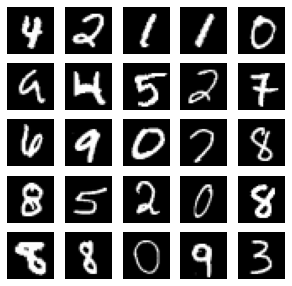

In [5]:
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

### Designing model architecture using Keras 


#### The MLP model, discussed above can be used for MNIST digits classification.

#### When the units or perceptrons are exposed, the MLP model is a fully connected network.

#### The following code shows how to design the MLP model architecture using Keras.

#### The first step in designing the model architecture is to import the Keras layers. This can be done as follows:

#### Import Keras layers 

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

#### Compute the number of labels 

In [7]:
num_labels = len(np.unique(y_train))

#### One-Hot Encoding 

In [9]:
#convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

 ### Data Preprocessing 

In [10]:
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [11]:
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

#### Setting network parameters 

In [12]:
batch_size = 128
hidden_units = 256
dropout = 0.45

#### Designing the model architecture

In [13]:
from keras.models import Sequential

model = Sequential()

In [15]:
#model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

### View model summary 

In [16]:
#Keras library provides us summary() method to check the model description.
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [18]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


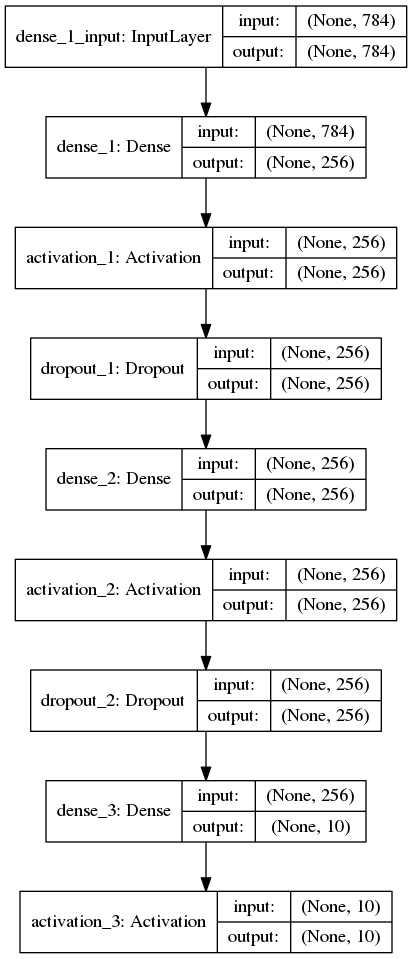

Implement MLP model using Keras

#### The implementation of MLP model in Keras comprises of three steps:-

#### Compiling the model with the compile() method.

#### Training the model with fit() method.

#### Evaluating the model performance with evaluate() method.

In [19]:
#Compile the model with compile() method 

model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

#### Train the model with fit() method 

In [20]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 6s 9ms/step - loss: 0.4198 - accuracy: 0.8714
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1939 - accuracy: 0.9422
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1509 - accuracy: 0.9553
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1287 - accuracy: 0.9606
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1128 - accuracy: 0.9649
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1037 - accuracy: 0.9681
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0922 - accuracy: 0.9709
Epoch 8/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0882 - accuracy: 0.9722
Epoch 9/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0843 - accuracy: 0.9733
Epoch 10/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0776 - accuracy: 0.9761

#### Evaluating model performance with evaluate() method 

In [21]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 1s 4ms/step - loss: 0.0601 - accuracy: 0.9830

Test accuracy: 98.3%


### Overfitting and Regularization 


A neural network has the property to memorize the characteristics of training data. This is called overfitting.

In such a case, the network fails to generalize when subject to the test data.

To avoid this tendency, the model uses a regularizing layer or function. A commonly used regularizing layer is referred to as a Dropout layer.



In [22]:
from keras.regularizers import l2
model.add(Dense(hidden_units,
                kernel_regularizer=l2(0.001),
                input_dim=input_size))

No additional layer is added if l1 or l2 regularization is used. The regularization is imposed in the Dense layer internally. For the proposed model, dropout still has a better performance than l2.

### Results and Conclusion
In this kernel, I build a dense neural network model to classify the MNIST digits and predict accuracy.

We get the test accuracy of 98.3%.

The accuracy tells us that our ANN model classifies the digits 98.3% of time correctly.